In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np

In [21]:
# File to Load (Remember to change these)

city_data_csv_path = "../Plots/Resources/city_data.csv"
ride_data_csv_path = "../Plots/Resources/ride_data.csv"

# Read the City and Ride Datacity_data_csv_path = "../Plots/Resources/city_data.csv"
city_df = pd.read_csv(city_data_csv_path)
ride_df = pd.read_csv(ride_data_csv_path)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
# Obtain the x and y coordinates for each of the three city types
grouped_df = pyber_df.groupby(["city"])

rural_df = pyber_df[pyber_df["type"]=="Rural"].groupby("city")
rural_ride = rural_df["ride_id"].count()
rural_fare= rural_df["fare"].mean()
rural_driver=rural_df["driver_count"].mean()

sub_df = pyber_df[pyber_df["type"]=="Suburban"].groupby("city")
sub_ride = sub_df["ride_id"].count()
sub_fare= sub_df["fare"].mean()
sub_driver=sub_df["driver_count"].mean()

urb_df = pyber_df[pyber_df["type"]=="Urban"].groupby("city")
urb_ride=urb_df["ride_id"].count()
urb_fare=urb_df["fare"].mean()
urb_driver=urb_df["driver_count"].mean()


y= rural_fare
x= rural_ride
s=rural_driver



## Bubble Plot of Ride Sharing Data

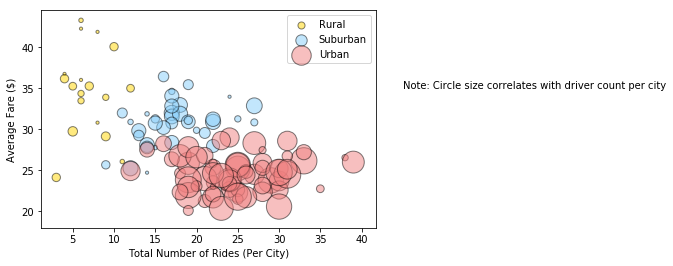

In [73]:
# Build the scatter plots for each city types
plt.scatter(rural_ride, rural_fare, facecolors="gold", edgecolors="black",
            s=rural_driver*10, alpha=0.50, label="Rural")
plt.scatter(sub_ride, sub_fare, facecolors="lightskyblue", edgecolors="black",
            s=sub_driver*10, alpha=0.50, label="Suburban")
plt.scatter(urb_ride, urb_fare, facecolors="lightcoral", edgecolors="black",
            s=urb_driver*10, alpha=0.50, label="Urban")

# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure
# Show plot
plt.legend()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45, 35, "Note: Circle size correlates with driver count per city")
plt.show()

## Total Fares by City Type

In [11]:
#Calculate Type Percents
city_ct = pyber_df.groupby("type").count()
city1_ct = pyber_df.groupby(["city"]).sum()["fare"]
# driver_ct= pyber_df.groupby(["city"]).sum
group_fare = pyber_df.groupby(["type"]).sum()["fare"]
typ_fare = pyber_df["fare"].sum()

# type_ct = pyber_df.groupby(["type"]).count()["city"]
tot_fare = group_fare / typ_fare*100
tot_fare


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

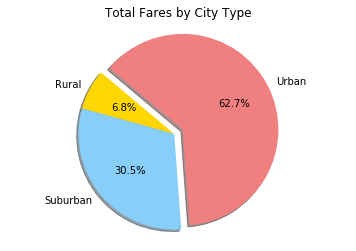

In [48]:
# Build Pie Chart
labels=["Rural", "Suburban", "Urban"]
mcolors=["gold", "lightskyblue", "lightcoral"] 
explode = (0, 0, 0.10)
# Save Figure
plt.title("Total Fares by City Type")
plt.pie(tot_fare, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
# Show Figure
plt.axis("equal")
plt.show()


## Total Rides by City Type

In [28]:
# Calculate Ride Percents
city_ct = pyber_df.groupby("type").count()
city1_ct = pyber_df.groupby(["city"]).sum()
ride_per = city_ct

# Save Figure
city_ct["city"]

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

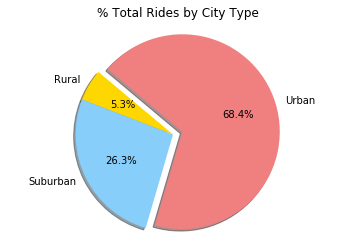

In [34]:
labels=["Rural", "Suburban", "Urban"]
sizes=[125, 625, 1625]
colors=["gold", "lightskyblue", "lightcoral"] 
explode = (0, 0, 0.10)


# Build Pie Chart
plt.title("% Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
# Show Figure
plt.axis("equal")
plt.show()

## Total Drivers by City Type

In [70]:
# Calculate Driver Percents
driver_ct= pyber_df.groupby("type").sum()
driver1_ct = pyber_df.groupby("driver_count").sum()

# Build Pie Charts


# Save Figure
driver_ct.driver_count

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

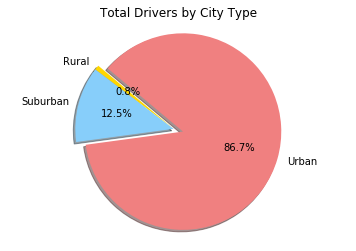

In [62]:
labels=["Rural", "Suburban", "Urban"]
sizes=[537, 8570, 59602]
colors=["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.10)


# Build Pie Chart
plt.title("% Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
# Show Figure
plt.axis("equal")
plt.show()